# Preprocessing dan implementasi Cosinus Similarity

## **Menampilkan data**

In [1]:
import requests
import csv
import pandas as pd
import re
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataf = pd.read_csv('/content/drive/MyDrive/penambangan_web/hasil/databerita.csv')
dataf

,Kategori,Judul,Tanggal,Link,Konten
0,Politik,"Buka Pembekalan Adat, Bupati Rohil Ajak Calon ...","Jun 12, 2023",https://www.detikinews.com/buka-pembekalan-ada...,"Rokan Hilir, detikinews.com — Bupati Rokan Hil..."
1,Politik,DPRD Kepulauan Meranti Gelar Rapat Paripurna P...,"Nov 18, 2022",https://www.detikinews.com/dprd-kepulauan-mera...,"SELATPANJANG, detikinews.com – DPRD Kepulauan ..."
2,Politik,Bupati Siak bersama Forkopimda Ikuti Upacara H...,"Jun 1, 2022",https://www.detikinews.com/bupati-siak-bersama...,"SIAK, detikinews.com — Bupati Siak Alfedri, di..."
3,Politik,Bupati H.M. Adil Akan Salurkan Dana BLT Rp200r...,"Sep 24, 2021",https://www.detikinews.com/bupati-h-m-adil-aka...,"Meranti, detikinews.com — Sesuai Program dan J..."
4,Politik,Wakil Bupati Bagus Santoso Sambut Kunjungan Si...,"Mei 5, 2021",https://www.detikinews.com/wakil-bupati-bagus-...,"Bengkalis, Detikinews.com — Pengurus Dewan Pim..."
5,Politik,H. Sari Antoni Kembali Terpilih Pada Musda V S...,"Agu 21, 2020",https://www.detikinews.com/h-sari-antoni-kemba...,"PASIR PENGARAIAN, Detikinews.com — Dewan Pimpi..."
6,Politik,Lipun Apresisasi Polda Riau Dalam Penegakan Hu...,"Feb 19, 2020",https://www.detikinews.com/lipun-apresisasi-po...,"BENGKALIS, Detikinews.com — Pasca pemanggilan..."
7,Sosial,Mahasiswa KKN UNRI Desa Sungai Batang Gelar So...,"Agu 18, 2023",https://www.detikinews.com/mahasiswa-kkn-unri-...,"BENGKALIS, detikinews.com – Guna meningkatkan ..."
8,Sosial,Bujang Kampung Fokus Pelayanan Sosial dan Kepe...,"Jul 16, 2022",https://www.detikinews.com/bujang-kampung-foku...,"SIAK, detikinews.com — Pemerintah kabupaten Si..."
9,Sosial,Sinergi di Bidang Layanan Administrasi Kependu...,"Jul 9, 2021",https://www.detikinews.com/sinergi-di-bidang-l...,"SIAK, detikinews.com — Pemerintah Kabupaten Si..."


### Cek data null

In [4]:
dataf.isnull().sum()

Kategori    0
Judul       0
Tanggal     0
Link        0
Konten      0
dtype: int64

### Hapus data null

In [5]:
df = dataf.dropna()
df.isnull().sum()

Kategori    0
Judul       0
Tanggal     0
Link        0
Konten      0
dtype: int64

### Reset Index

In [6]:
df = df.reset_index(drop=True)

In [7]:
df.shape

(55, 5)

### Menghitung jumlah data perkategori

In [8]:
df['Kategori'].value_counts()

Sosial      42
Politik      7
Olahraga     6
Name: Kategori, dtype: int64

## Preprocessing

### Cleaning data

In [9]:
# Daftar kata yang ingin dihilangkan
kata_hapus = ['Advertisement', 'Beritasatu.com', '\n']

# Melakukan pengolahan pada setiap baris di kolom 'Konten'
for kata in kata_hapus:
    df['Konten'] = df['Konten'].str.replace(kata, '')

# Menampilkan DataFrame setelah pengolahan
print(df)

    Kategori                                              Judul       Tanggal  \
0    Politik  Buka Pembekalan Adat, Bupati Rohil Ajak Calon ...  Jun 12, 2023   
1    Politik  DPRD Kepulauan Meranti Gelar Rapat Paripurna P...  Nov 18, 2022   
2    Politik  Bupati Siak bersama Forkopimda Ikuti Upacara H...   Jun 1, 2022   
3    Politik  Bupati H.M. Adil Akan Salurkan Dana BLT Rp200r...  Sep 24, 2021   
4    Politik  Wakil Bupati Bagus Santoso Sambut Kunjungan Si...   Mei 5, 2021   
5    Politik  H. Sari Antoni Kembali Terpilih Pada Musda V S...  Agu 21, 2020   
6    Politik  Lipun Apresisasi Polda Riau Dalam Penegakan Hu...  Feb 19, 2020   
7     Sosial  Mahasiswa KKN UNRI Desa Sungai Batang Gelar So...  Agu 18, 2023   
8     Sosial  Bujang Kampung Fokus Pelayanan Sosial dan Kepe...  Jul 16, 2022   
9     Sosial  Sinergi di Bidang Layanan Administrasi Kependu...   Jul 9, 2021   
10    Sosial  Bupati Siak Buka Sosialisasi Bentuk KBD dan Sa...  Jun 12, 2020   
11    Sosial  Ini Cara Kades

<ipython-input-9-2303c42add5a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Konten'] = df['Konten'].str.replace(kata, '')


In [10]:
df.shape

(55, 5)

In [11]:
df['cleaning'] = df['Konten'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
df

,Kategori,Judul,Tanggal,Link,Konten,cleaning
0,Politik,"Buka Pembekalan Adat, Bupati Rohil Ajak Calon ...","Jun 12, 2023",https://www.detikinews.com/buka-pembekalan-ada...,"Rokan Hilir, detikinews.com — Bupati Rokan Hil...","rokan hilir, detikinews.com bupati rokan hili..."
1,Politik,DPRD Kepulauan Meranti Gelar Rapat Paripurna P...,"Nov 18, 2022",https://www.detikinews.com/dprd-kepulauan-mera...,"SELATPANJANG, detikinews.com – DPRD Kepulauan ...","selatpanjang, detikinews.com dprd kepulauan m..."
2,Politik,Bupati Siak bersama Forkopimda Ikuti Upacara H...,"Jun 1, 2022",https://www.detikinews.com/bupati-siak-bersama...,"SIAK, detikinews.com — Bupati Siak Alfedri, di...","siak, detikinews.com bupati siak alfedri, did..."
3,Politik,Bupati H.M. Adil Akan Salurkan Dana BLT Rp200r...,"Sep 24, 2021",https://www.detikinews.com/bupati-h-m-adil-aka...,"Meranti, detikinews.com — Sesuai Program dan J...","meranti, detikinews.com sesuai program dan ja..."
4,Politik,Wakil Bupati Bagus Santoso Sambut Kunjungan Si...,"Mei 5, 2021",https://www.detikinews.com/wakil-bupati-bagus-...,"Bengkalis, Detikinews.com — Pengurus Dewan Pim...","bengkalis, detikinews.com pengurus dewan pimp..."
5,Politik,H. Sari Antoni Kembali Terpilih Pada Musda V S...,"Agu 21, 2020",https://www.detikinews.com/h-sari-antoni-kemba...,"PASIR PENGARAIAN, Detikinews.com — Dewan Pimpi...","pasir pengaraian, detikinews.com dewan pimpin..."
6,Politik,Lipun Apresisasi Polda Riau Dalam Penegakan Hu...,"Feb 19, 2020",https://www.detikinews.com/lipun-apresisasi-po...,"BENGKALIS, Detikinews.com — Pasca pemanggilan...","bengkalis, detikinews.com pasca pemanggilan ..."
7,Sosial,Mahasiswa KKN UNRI Desa Sungai Batang Gelar So...,"Agu 18, 2023",https://www.detikinews.com/mahasiswa-kkn-unri-...,"BENGKALIS, detikinews.com – Guna meningkatkan ...","bengkalis, detikinews.com guna meningkatkan k..."
8,Sosial,Bujang Kampung Fokus Pelayanan Sosial dan Kepe...,"Jul 16, 2022",https://www.detikinews.com/bujang-kampung-foku...,"SIAK, detikinews.com — Pemerintah kabupaten Si...","siak, detikinews.com pemerintah kabupaten sia..."
9,Sosial,Sinergi di Bidang Layanan Administrasi Kependu...,"Jul 9, 2021",https://www.detikinews.com/sinergi-di-bidang-l...,"SIAK, detikinews.com — Pemerintah Kabupaten Si...","siak, detikinews.com pemerintah kabupaten sia..."


### Tokenisasi

In [12]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# # Ubah kolom Konten menjadi string
# df['cleaning'] = df['cleaning'].astype(str)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
# Tokenisasi teks menjadi kalimat menggunakan nltk
df['tokenize'] = df['cleaning'].apply(nltk.sent_tokenize)
df

,Kategori,Judul,Tanggal,Link,Konten,cleaning,tokenize
0,Politik,"Buka Pembekalan Adat, Bupati Rohil Ajak Calon ...","Jun 12, 2023",https://www.detikinews.com/buka-pembekalan-ada...,"Rokan Hilir, detikinews.com — Bupati Rokan Hil...","rokan hilir, detikinews.com bupati rokan hili...","[rokan hilir, detikinews.com bupati rokan hil..."
1,Politik,DPRD Kepulauan Meranti Gelar Rapat Paripurna P...,"Nov 18, 2022",https://www.detikinews.com/dprd-kepulauan-mera...,"SELATPANJANG, detikinews.com – DPRD Kepulauan ...","selatpanjang, detikinews.com dprd kepulauan m...","[selatpanjang, detikinews.com dprd kepulauan ..."
2,Politik,Bupati Siak bersama Forkopimda Ikuti Upacara H...,"Jun 1, 2022",https://www.detikinews.com/bupati-siak-bersama...,"SIAK, detikinews.com — Bupati Siak Alfedri, di...","siak, detikinews.com bupati siak alfedri, did...","[siak, detikinews.com bupati siak alfedri, di..."
3,Politik,Bupati H.M. Adil Akan Salurkan Dana BLT Rp200r...,"Sep 24, 2021",https://www.detikinews.com/bupati-h-m-adil-aka...,"Meranti, detikinews.com — Sesuai Program dan J...","meranti, detikinews.com sesuai program dan ja...","[meranti, detikinews.com sesuai program dan j..."
4,Politik,Wakil Bupati Bagus Santoso Sambut Kunjungan Si...,"Mei 5, 2021",https://www.detikinews.com/wakil-bupati-bagus-...,"Bengkalis, Detikinews.com — Pengurus Dewan Pim...","bengkalis, detikinews.com pengurus dewan pimp...","[bengkalis, detikinews.com pengurus dewan pim..."
5,Politik,H. Sari Antoni Kembali Terpilih Pada Musda V S...,"Agu 21, 2020",https://www.detikinews.com/h-sari-antoni-kemba...,"PASIR PENGARAIAN, Detikinews.com — Dewan Pimpi...","pasir pengaraian, detikinews.com dewan pimpin...","[pasir pengaraian, detikinews.com dewan pimpi..."
6,Politik,Lipun Apresisasi Polda Riau Dalam Penegakan Hu...,"Feb 19, 2020",https://www.detikinews.com/lipun-apresisasi-po...,"BENGKALIS, Detikinews.com — Pasca pemanggilan...","bengkalis, detikinews.com pasca pemanggilan ...","[bengkalis, detikinews.com pasca pemanggilan..."
7,Sosial,Mahasiswa KKN UNRI Desa Sungai Batang Gelar So...,"Agu 18, 2023",https://www.detikinews.com/mahasiswa-kkn-unri-...,"BENGKALIS, detikinews.com – Guna meningkatkan ...","bengkalis, detikinews.com guna meningkatkan k...","[bengkalis, detikinews.com guna meningkatkan ..."
8,Sosial,Bujang Kampung Fokus Pelayanan Sosial dan Kepe...,"Jul 16, 2022",https://www.detikinews.com/bujang-kampung-foku...,"SIAK, detikinews.com — Pemerintah kabupaten Si...","siak, detikinews.com pemerintah kabupaten sia...","[siak, detikinews.com pemerintah kabupaten si..."
9,Sosial,Sinergi di Bidang Layanan Administrasi Kependu...,"Jul 9, 2021",https://www.detikinews.com/sinergi-di-bidang-l...,"SIAK, detikinews.com — Pemerintah Kabupaten Si...","siak, detikinews.com pemerintah kabupaten sia...","[siak, detikinews.com pemerintah kabupaten si..."


### TF IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
tfidf_matrices = []
set_len_doc = df['tokenize']
for i in set_len_doc: #perulangan setiap artikel/dokumen

  tfidf_vectorizer = TfidfVectorizer()  #inisialisasi tfidf
  tfidf_matrix = tfidf_vectorizer.fit_transform(i) #menjadikan tfidf setiap dokumen
  tfidf_matrices.append(tfidf_matrix) #memasukkan hasil matrix tfidf ke tfidf_matrices

In [16]:
for xdoc, tfidf_matrix in enumerate(tfidf_matrices):
    print(f'========== Document ke-{xdoc} ==========')

    # Loop untuk setiap kalimat dalam dokumen
    for isentence, sentence_tfidf in enumerate(tfidf_matrix.toarray()):
        print(f'Kalimat ke-{isentence + 1}: ', end='')

        # Loop untuk setiap kata dalam kalimat
        for word_idx, tfidf_value in enumerate(sentence_tfidf):
            if tfidf_value > 0:
                print(f'[{word_idx + 1}:{tfidf_value:.4f}], ', end='')

        print()  # Memberikan baris kosong antara kalimat

    print('\n')  # Memberikan baris kosong antara dokumen


========== Document ke-0 ==========
Kalimat ke-1: [1:0.0940], [2:0.0940], [3:0.0940], [4:0.0940], [6:0.1516], [8:0.0758], [9:0.0629], [10:0.1259], [14:0.0758], [15:0.0940], [21:0.0940], [26:0.1259], [27:0.1791], [29:0.0940], [30:0.1516], [33:0.1516], [36:0.0940], [37:0.0629], [39:0.0940], [43:0.1880], [47:0.0940], [50:0.1880], [55:0.1259], [61:0.0940], [65:0.0940], [66:0.0940], [70:0.2275], [72:0.0940], [79:0.1259], [82:0.0940], [84:0.0758], [85:0.0629], [88:0.1888], [95:0.0940], [97:0.0758], [98:0.0940], [99:0.1259], [101:0.0758], [102:0.0758], [104:0.2239], [105:0.0940], [107:0.1880], [110:0.0940], [111:0.0940], [112:0.2118], [113:0.1880], [117:0.0940], [122:0.0758], [123:0.0940], [124:0.0758], [129:0.1259], [132:0.0940], [133:0.0940], [134:0.1516], [137:0.0758], [139:0.0940], [140:0.1880], [141:0.1516], [150:0.0629], [151:0.0758], [152:0.0758], [154:0.3147], 
Kalimat ke-2: [9:0.1365], [13:0.2039], [16:0.2039], [17:0.2039], [23:0.2039], [26:0.1365], [27:0.1943], [32:0.1645], [52:0.20

### Cosine Similarity

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

cos_sim_results = []  # untuk menyimpan hasil cosine similarity akhir
graf_results = []  # untuk menyimpan hasil graf akhir
threshold = 0.08  # inisialisasi threshold

for idx, tfidf_matrix in enumerate(tfidf_matrices):
    # print(f'========= Document ke-{idx} ==========')

    cos_sim_now = []
    graf_now = nx.DiGraph()
    cos_sim = cosine_similarity(tfidf_matrix)  # mengubah tfidf menjadi cosine similarity

    for i_hasil in range(len(cos_sim)):  # inisialisasi indeks awal perulangan dari setiap hasil cosine
        arr_cosim = []

        for j_hasil in range(i_hasil + 1, len(cos_sim)):  # inisialisasi indeks kedua perulangan dari setiap hasil cosine
            if cos_sim[i_hasil][j_hasil] > threshold:  # cek apakah cosim dari kalimat 1 dan 2 lebih dari threshold?
                # print(f'Similarity kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')

                arr_cosim.append([i_hasil, j_hasil, cos_sim[i_hasil][j_hasil]])  # menyimpan nilai indeks awal, indeks awal+1, hasil cosim
                graf_now.add_edge(i_hasil, j_hasil, weight=cos_sim[i_hasil][j_hasil])  # menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim

        cos_sim_now.append(arr_cosim)
        # graf_now.append(graf_current)
    cos_sim_results.append(cos_sim_now)
    graf_results.append(graf_now)
    # print('\n')


In [18]:
# Menampilkan hasil cosine similarity
for idx, cos_sim_now in enumerate(cos_sim_results):
    print(f'========= Document ke-{idx} ==========')
    for i, arr_cosim in enumerate(cos_sim_now):
        for similarity_info in arr_cosim:
            sentence1, sentence2, similarity_value = similarity_info
            print(f'- Nilai Cosine Similarity kalimat {sentence1 + 1} - {sentence2 + 1} = {similarity_value:.4f}')
    print('\n')


========= Document ke-0 ==========
- Nilai Cosine Similarity kalimat 1 - 2 = 0.1582
- Nilai Cosine Similarity kalimat 1 - 3 = 0.2764
- Nilai Cosine Similarity kalimat 1 - 4 = 0.4009
- Nilai Cosine Similarity kalimat 1 - 5 = 0.2301
- Nilai Cosine Similarity kalimat 2 - 3 = 0.1975
- Nilai Cosine Similarity kalimat 2 - 4 = 0.1754
- Nilai Cosine Similarity kalimat 3 - 4 = 0.1012
- Nilai Cosine Similarity kalimat 3 - 5 = 0.0827
- Nilai Cosine Similarity kalimat 4 - 5 = 0.2467


========= Document ke-1 ==========
- Nilai Cosine Similarity kalimat 1 - 2 = 0.1088
- Nilai Cosine Similarity kalimat 1 - 3 = 0.1160
- Nilai Cosine Similarity kalimat 1 - 4 = 0.1818
- Nilai Cosine Similarity kalimat 1 - 6 = 0.1564
- Nilai Cosine Similarity kalimat 1 - 8 = 0.0895
- Nilai Cosine Similarity kalimat 1 - 13 = 0.0838
- Nilai Cosine Similarity kalimat 1 - 14 = 0.1092
- Nilai Cosine Similarity kalimat 1 - 15 = 0.1986
- Nilai Cosine Similarity kalimat 1 - 16 = 0.2118
- Nilai Cosine Similarity kalimat 1 - 17 =

### Closenes Centrality

In [19]:
# import library untuk graph
import matplotlib.pyplot as plt

In [24]:
# (Cek) Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(graf_results[54])
closeness_centrality

{0: 0.0, 1: 0.25, 2: 0.5, 3: 0.75, 4: 0.5}

Pengurutan dengan nilai terbesar

In [25]:
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_closeness

{3: 0.75, 2: 0.5, 4: 0.5, 1: 0.25, 0: 0.0}

Print hasil Closenes Centrality

In [26]:
for i in range(len(graf_results)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_results[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  print('\n')

========= document ke-0 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.25
Closenes Centrality Node 2 = 0.5
Closenes Centrality Node 3 = 0.75
Closenes Centrality Node 4 = 0.8


========= document ke-1 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.025
Closenes Centrality Node 2 = 0.05
Closenes Centrality Node 3 = 0.075
Closenes Centrality Node 5 = 0.125
Closenes Centrality Node 7 = 0.175
Closenes Centrality Node 12 = 0.225
Closenes Centrality Node 13 = 0.275
Closenes Centrality Node 14 = 0.3
Closenes Centrality Node 15 = 0.2816666666666667
Closenes Centrality Node 16 = 0.28823529411764703
Closenes Centrality Node 21 = 0.43478260869565216
Closenes Centrality Node 22 = 0.4240384615384616
Closenes Centrality Node 31 = 0.318421052631579
Closenes Centrality Node 36 = 0.7410256410256411
Closenes Centrality Node 40 = 0.7847826086956522
Closenes Centrality Node 4 = 0.08000000000000002
Closenes Centrality Node 6 = 0.12857142857142

### **Summarize**

In [27]:
list_ringkasan = []

for i in range(len(graf_results)):
    closeness_centrality_all = nx.closeness_centrality(graf_results[i])
    sorted_closeness_all = dict(sorted(closeness_centrality_all.items(), key=lambda item: item[1], reverse=True))

    nilaimaxkalimat = []
    for x in range(4):
        max_key = None
        max_value = None

        for key, value in sorted_closeness_all.items():
            if key not in nilaimaxkalimat and (max_value is None or value > max_value):
                max_key = key
                max_value = value

        if max_key is not None:
            nilaimaxkalimat.append(max_key)

    data_ringkasan = []
    for j in nilaimaxkalimat:
        ringkasan = df['tokenize'][i][j]
        data_ringkasan.append(ringkasan)

    list_ringkasan.append(data_ringkasan)

list_ringkasan

[['sehingga dengan mengikuti pembekalan ini, diaharapkan para calon penghulu akan semakin memahami tentang sejarah melayu di rohil serta mengetahui afat istiadat melayu dalam kehidupan seharihari.inf',
  'jangan kita cederai demokrasi ini dengan politik uang, jelas bupati.selain itu, bupati juga meminta kepada seluruh calon penghulu maupun tim sukses nya untuk samasama menjaga kondusifitas di wilayahnya masingmasing agar pelaksanaan pemilihan serentak ini dapat berjalan aman dan lancar.disamping itu, bupati rohil juga mengucapkan terimakasih kepada dprd rohil dan lamr yang telah maraton secara bersama menggelar rapat agar para calon penghulu diwajibkan mendapatkan warkah dari lamr rohil sebagai salah satu persyaratannya.dengan adanya warkah ini, maka adat istiadat melayu di bumi ini akan semakin dijunjung tinggi dan budaya melayu semakin bisa terus berkembang, harapnya.sementara itu ketua mka lamr rohil nasrudin hasan juga memberikan apresiasi kepada bupati rohil afrizal sintong yang t

In [28]:
# Penggabungan kalimat ringkasan
dataSummary = pd.DataFrame(list_ringkasan, columns=['Ringkasan1', 'Ringkasan2', 'Ringkasan3', 'Ringkasan4'])
dataSummary['Ringkasan'] = dataSummary.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)
dataSummary = pd.concat([dataSummary['Ringkasan'], df['Kategori']], axis=1)


In [29]:
dataSummary

,Ringkasan,Kategori
0,"sehingga dengan mengikuti pembekalan ini, diah...",Politik
1,"maka dengan demikian, pembiayaan netto sebesar...",Politik
2,"untuk itu, presiden mengajak seluruh pihak unt...",Politik
3,untuk bantuan blt yang akan diberikan kepada m...,Politik
4,memberikan buku kenangan juga ketua pwmoi memb...,Politik
5,bakal calon yang beritikad mendaftar harus mem...,Politik
6,menurut jebolan magister hukum universitas lan...,Politik
7,,Sosial
8,,Sosial
9,mou ini ada dua hal dan berkait dengan dua ins...,Sosial


In [31]:
#Simpan ke csv
dataSummary.to_csv('/content/drive/MyDrive/penambangan_web/hasil/ringkasan.csv', index=False)

## Modelling Data Ringkasan / Summary

In [32]:
dataSummary = pd.read_csv('/content/drive/MyDrive/penambangan_web/hasil/ringkasan.csv')
dataSummary

,Ringkasan,Kategori
0,"sehingga dengan mengikuti pembekalan ini, diah...",Politik
1,"maka dengan demikian, pembiayaan netto sebesar...",Politik
2,"untuk itu, presiden mengajak seluruh pihak unt...",Politik
3,untuk bantuan blt yang akan diberikan kepada m...,Politik
4,memberikan buku kenangan juga ketua pwmoi memb...,Politik
5,bakal calon yang beritikad mendaftar harus mem...,Politik
6,menurut jebolan magister hukum universitas lan...,Politik
7,NaN,Sosial
8,NaN,Sosial
9,mou ini ada dua hal dan berkait dengan dua ins...,Sosial


### Preprocessing

In [33]:
dataSummary.isnull().sum()

Ringkasan    5
Kategori     0
dtype: int64

In [34]:
dataringkas = dataSummary.dropna()
dataringkas.isnull().sum()

Ringkasan    0
Kategori     0
dtype: int64

In [35]:
dataringkas['Kategori'].value_counts()

Sosial      37
Politik      7
Olahraga     6
Name: Kategori, dtype: int64

### Punctuation

Punctuation dalam NLP merujuk pada karakter tanda baca seperti titik (. ), koma (, ), tanda tanya (?), tanda seru (!), dan karakter tanda baca lainnya dalam teks bahasa alami. Dalam analisis NLP, tanda baca seringkali dianggap sebagai "noise" atau gangguan yang dapat mempengaruhi pemrosesan teks.

In [36]:
import string
#kolom baru
dataringkas['r_punctuation'] = dataringkas['Ringkasan'].str.replace(r'[^\w\s]', '', regex=True).str.lower()

# Menghilangkan angka dari kolom 'ringkasan'
dataringkas['r_punctuation'] = dataringkas['r_punctuation'].str.replace('\d+', '', regex=True)

dataringkas

<ipython-input-36-1164fa7a91ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataringkas['r_punctuation'] = dataringkas['Ringkasan'].str.replace(r'[^\w\s]', '', regex=True).str.lower()
<ipython-input-36-1164fa7a91ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataringkas['r_punctuation'] = dataringkas['r_punctuation'].str.replace('\d+', '', regex=True)


,Ringkasan,Kategori,r_punctuation
0,"sehingga dengan mengikuti pembekalan ini, diah...",Politik,sehingga dengan mengikuti pembekalan ini diaha...
1,"maka dengan demikian, pembiayaan netto sebesar...",Politik,maka dengan demikian pembiayaan netto sebesar ...
2,"untuk itu, presiden mengajak seluruh pihak unt...",Politik,untuk itu presiden mengajak seluruh pihak untu...
3,untuk bantuan blt yang akan diberikan kepada m...,Politik,untuk bantuan blt yang akan diberikan kepada m...
4,memberikan buku kenangan juga ketua pwmoi memb...,Politik,memberikan buku kenangan juga ketua pwmoi memb...
5,bakal calon yang beritikad mendaftar harus mem...,Politik,bakal calon yang beritikad mendaftar harus mem...
6,menurut jebolan magister hukum universitas lan...,Politik,menurut jebolan magister hukum universitas lan...
9,mou ini ada dua hal dan berkait dengan dua ins...,Sosial,mou ini ada dua hal dan berkait dengan dua ins...
10,"pohon yang ditanam ini merupakan wakaf, kelak ...",Sosial,pohon yang ditanam ini merupakan wakaf kelak p...
12,"lanjut feri ,ikut bergabung juga iptu rusmizah...",Sosial,lanjut feri ikut bergabung juga iptu rusmizahe...


### Stopwords

Stopwords adalah kata-kata umum yang seringkali diabaikan atau dihapus saat melakukan analisis teks karena kurangnya informasi yang spesifik. Kata-kata ini umumnya tidak memberikan nilai tambah pada pemahaman konten teks.

In [37]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  dataringkas['r_stopword'] = dataringkas['r_punctuation'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string


<ipython-input-38-8bf93ee7c2d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataringkas['r_stopword'] = dataringkas['r_punctuation'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string


In [39]:
dataringkas

,Ringkasan,Kategori,r_punctuation,r_stopword
0,"sehingga dengan mengikuti pembekalan ini, diah...",Politik,sehingga dengan mengikuti pembekalan ini diaha...,sehingga dengan mengikuti pembekalan ini diaha...
1,"maka dengan demikian, pembiayaan netto sebesar...",Politik,maka dengan demikian pembiayaan netto sebesar ...,maka dengan demikian pembiayaan netto sebesar ...
2,"untuk itu, presiden mengajak seluruh pihak unt...",Politik,untuk itu presiden mengajak seluruh pihak untu...,untuk itu presiden mengajak seluruh pihak untu...
3,untuk bantuan blt yang akan diberikan kepada m...,Politik,untuk bantuan blt yang akan diberikan kepada m...,untuk bantuan blt yang akan diberikan kepada m...
4,memberikan buku kenangan juga ketua pwmoi memb...,Politik,memberikan buku kenangan juga ketua pwmoi memb...,memberikan buku kenangan juga ketua pwmoi memb...
5,bakal calon yang beritikad mendaftar harus mem...,Politik,bakal calon yang beritikad mendaftar harus mem...,bakal calon yang beritikad mendaftar harus mem...
6,menurut jebolan magister hukum universitas lan...,Politik,menurut jebolan magister hukum universitas lan...,menurut jebolan magister hukum universitas lan...
9,mou ini ada dua hal dan berkait dengan dua ins...,Sosial,mou ini ada dua hal dan berkait dengan dua ins...,mou ini ada dua hal dan berkait dengan dua ins...
10,"pohon yang ditanam ini merupakan wakaf, kelak ...",Sosial,pohon yang ditanam ini merupakan wakaf kelak p...,pohon yang ditanam ini merupakan wakaf kelak p...
12,"lanjut feri ,ikut bergabung juga iptu rusmizah...",Sosial,lanjut feri ikut bergabung juga iptu rusmizahe...,lanjut feri ikut bergabung juga iptu rusmizahe...


### Tokenizing

In [40]:
dataringkas['r_token'] = dataringkas['r_stopword'].apply(word_tokenize)


<ipython-input-40-ae617e0b23b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataringkas['r_token'] = dataringkas['r_stopword'].apply(word_tokenize)


In [41]:
dataringkas

,Ringkasan,Kategori,r_punctuation,r_stopword,r_token
0,"sehingga dengan mengikuti pembekalan ini, diah...",Politik,sehingga dengan mengikuti pembekalan ini diaha...,sehingga dengan mengikuti pembekalan ini diaha...,"[sehingga, dengan, mengikuti, pembekalan, ini,..."
1,"maka dengan demikian, pembiayaan netto sebesar...",Politik,maka dengan demikian pembiayaan netto sebesar ...,maka dengan demikian pembiayaan netto sebesar ...,"[maka, dengan, demikian, pembiayaan, netto, se..."
2,"untuk itu, presiden mengajak seluruh pihak unt...",Politik,untuk itu presiden mengajak seluruh pihak untu...,untuk itu presiden mengajak seluruh pihak untu...,"[untuk, itu, presiden, mengajak, seluruh, piha..."
3,untuk bantuan blt yang akan diberikan kepada m...,Politik,untuk bantuan blt yang akan diberikan kepada m...,untuk bantuan blt yang akan diberikan kepada m...,"[untuk, bantuan, blt, yang, akan, diberikan, k..."
4,memberikan buku kenangan juga ketua pwmoi memb...,Politik,memberikan buku kenangan juga ketua pwmoi memb...,memberikan buku kenangan juga ketua pwmoi memb...,"[memberikan, buku, kenangan, juga, ketua, pwmo..."
5,bakal calon yang beritikad mendaftar harus mem...,Politik,bakal calon yang beritikad mendaftar harus mem...,bakal calon yang beritikad mendaftar harus mem...,"[bakal, calon, yang, beritikad, mendaftar, har..."
6,menurut jebolan magister hukum universitas lan...,Politik,menurut jebolan magister hukum universitas lan...,menurut jebolan magister hukum universitas lan...,"[menurut, jebolan, magister, hukum, universita..."
9,mou ini ada dua hal dan berkait dengan dua ins...,Sosial,mou ini ada dua hal dan berkait dengan dua ins...,mou ini ada dua hal dan berkait dengan dua ins...,"[mou, ini, ada, dua, hal, dan, berkait, dengan..."
10,"pohon yang ditanam ini merupakan wakaf, kelak ...",Sosial,pohon yang ditanam ini merupakan wakaf kelak p...,pohon yang ditanam ini merupakan wakaf kelak p...,"[pohon, yang, ditanam, ini, merupakan, wakaf, ..."
12,"lanjut feri ,ikut bergabung juga iptu rusmizah...",Sosial,lanjut feri ikut bergabung juga iptu rusmizahe...,lanjut feri ikut bergabung juga iptu rusmizahe...,"[lanjut, feri, ikut, bergabung, juga, iptu, ru..."


### TF-IDF Ringkasan

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

datr_ringkas = dataringkas['r_token'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(datr_ringkas).toarray()
terms = tfidf_vectorizer.get_feature_names_out()

datr_ringkas_tfidf = pd.DataFrame(tfidf_matrix, columns=terms)
datr_ringkas_tfidf.insert(0, 'Ringkasan', datr_ringkas)

datr_ringkas_tfidf

,Ringkasan,abadikan,abdul,acara,aceh,acuan,ada,adalah,adanya,adapun,...,zakaria,zaki,zero,zohrison,zona,zoom,zulhelmizulhelmi,zulkarnain,zulkenedi,zulkifli
0,sehingga dengan mengikuti pembekalan ini diaha...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038059,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,maka dengan demikian pembiayaan netto sebesar ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.030168,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027848,0.000000
2,untuk itu presiden mengajak seluruh pihak untu...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,untuk bantuan blt yang akan diberikan kepada m...,0.000000,0.000000,0.000000,0.000000,0.000000,0.033539,0.000000,0.086417,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,memberikan buku kenangan juga ketua pwmoi memb...,0.000000,0.042864,0.000000,0.000000,0.000000,0.037009,0.000000,0.000000,0.000000,...,0.051243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,bakal calon yang beritikad mendaftar harus mem...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032194,0.000000,0.000000
6,menurut jebolan magister hukum universitas lan...,0.000000,0.116103,0.000000,0.000000,0.000000,0.050122,0.000000,0.043049,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.023716,0.081477,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.097307,0.000000,0.000000,0.000000,0.000000,0.000000
8,NaN,0.000000,0.000000,0.039834,0.000000,0.000000,0.022296,0.000000,0.038299,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055837
9,mou ini ada dua hal dan berkait dengan dua ins...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046649,0.040066,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Penggabungan TF IDF - Kategori

In [43]:
tfidf_label = pd.concat([datr_ringkas_tfidf,dataringkas['Kategori']],axis=1)
tfidf_label

,Ringkasan,abadikan,abdul,acara,aceh,acuan,ada,adalah,adanya,adapun,...,zaki,zero,zohrison,zona,zoom,zulhelmizulhelmi,zulkarnain,zulkenedi,zulkifli,Kategori
0,sehingga dengan mengikuti pembekalan ini diaha...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.038059,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Politik
1,maka dengan demikian pembiayaan netto sebesar ...,0.000000,0.000000,0.000000,0.000000,0.000000,0.030168,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027848,0.000000,Politik
2,untuk itu presiden mengajak seluruh pihak untu...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Politik
3,untuk bantuan blt yang akan diberikan kepada m...,0.000000,0.000000,0.000000,0.000000,0.000000,0.033539,0.000000,0.086417,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Politik
4,memberikan buku kenangan juga ketua pwmoi memb...,0.000000,0.042864,0.000000,0.000000,0.000000,0.037009,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Politik
5,bakal calon yang beritikad mendaftar harus mem...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032194,0.000000,0.000000,Politik
6,menurut jebolan magister hukum universitas lan...,0.000000,0.116103,0.000000,0.000000,0.000000,0.050122,0.000000,0.043049,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Politik
7,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.023716,0.081477,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.097307,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
8,NaN,0.000000,0.000000,0.039834,0.000000,0.000000,0.022296,0.000000,0.038299,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055837,NaN
9,mou ini ada dua hal dan berkait dengan dua ins...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046649,0.040066,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Sosial


### Hapus data Nan

In [44]:
# Menghapus baris yang mengandung nilai NaN
tfidf_label_cleaned = tfidf_label.dropna()

# Cek hasil setelah menghapus nilai NaN
print(tfidf_label_cleaned)


                                            Ringkasan  abadikan     abdul  \
0   sehingga dengan mengikuti pembekalan ini diaha...  0.000000  0.000000   
1   maka dengan demikian pembiayaan netto sebesar ...  0.000000  0.000000   
2   untuk itu presiden mengajak seluruh pihak untu...  0.000000  0.000000   
3   untuk bantuan blt yang akan diberikan kepada m...  0.000000  0.000000   
4   memberikan buku kenangan juga ketua pwmoi memb...  0.000000  0.042864   
5   bakal calon yang beritikad mendaftar harus mem...  0.000000  0.000000   
6   menurut jebolan magister hukum universitas lan...  0.000000  0.116103   
9   mou ini ada dua hal dan berkait dengan dua ins...  0.000000  0.000000   
10  pohon yang ditanam ini merupakan wakaf kelak p...  0.000000  0.000000   
12  lanjut feri ikut bergabung juga iptu rusmizahe...  0.000000  0.000000   
13  kita inginkan seluruh masyarakat rohil bisa me...  0.000000  0.000000   
14  oleh karena itu dengan adanya komitmen ini bel...  0.000000  0.000000   

# Modelling

## Naive Bayes

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [46]:
x = tfidf_label_cleaned.iloc[:, 1:-1]
y = tfidf_label_cleaned.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy_naiveBayes = accuracy_score(y_test, y_pred)
print(f'Akurasi model Naive Bayes: {accuracy_naiveBayes}')

Akurasi model Naive Bayes: 0.7777777777777778


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

# Latih model pada kolom topik tertentu
rf.fit(X_train, y_train)

# Lakukan prediksi
y_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')

Akurasi model Random Forest: 0.8888888888888888


## KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier()

# Latih model pada kolom topik tertentu
knn.fit(X_train, y_train)

# Lakukan prediksi
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Akurasi model KNN: {accuracy_knn}')

Akurasi model KNN: 0.8888888888888888


# Visualisasi Graph

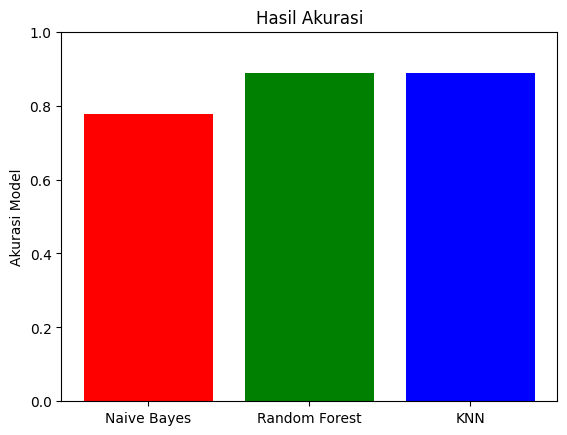

In [51]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Random Forest', 'KNN']
accuracies = [accuracy_naiveBayes,accuracy_rf,accuracy_knn]

plt.bar(models, accuracies, color=[ 'red', 'green', 'blue'])
plt.ylabel('Akurasi Model')
plt.title('Hasil Akurasi')
plt.ylim(0, 1)
plt.show()